# All Players Bowling Stats

### This is a notebook exploring the bowling statistics of GCCC players in 2024

In [2]:
# Importing data analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading in the dataframe using pandas
df = pd.read_csv("updated bowling stats 09-09-2024.csv", index_col="Rank")
df

,Player,OVERS,MAIDENS,RUNS,WICKETS,BEST BOWLING,5 WICKET HAUL,ECONOMY RATE,STRIKE RATE,AVERAGE
Rank,,,,,,,,,,
1,Rob Firth,93.5,18,341,32,6/24,3,3.63,17.59,10.66
2,Tommy Howton,104.5,22,317,32,6/9,1,3.02,19.66,9.91
3,Arunkumar Sathiamoorthy,152.1,22,572,32,5/20,1,3.76,28.53,17.88
4,Paul Davis,85.4,12,309,27,5/6,1,3.61,19.04,11.44
5,Lucas Maidstone,80.1,4,352,22,5/18,1,4.39,21.86,16.00
6,shahrokh navaee,49.2,10,151,16,5/20,1,3.06,18.50,9.44
7,Euan West,48.2,3,264,12,3/7,0,5.46,24.17,22.00
8,Daniel Cadd,78.2,9,340,12,2/1,0,4.34,39.17,28.33
9,Sam Quigley,55.3,4,279,10,2/5,0,5.03,33.30,27.90


In [4]:
# Identifying data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 28
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         28 non-null     object 
 1   OVERS          28 non-null     float64
 2   MAIDENS        28 non-null     int64  
 3   RUNS           28 non-null     int64  
 4   WICKETS        28 non-null     int64  
 5   BEST BOWLING   28 non-null     object 
 6   5 WICKET HAUL  28 non-null     int64  
 7   ECONOMY RATE   28 non-null     float64
 8   STRIKE RATE    28 non-null     float64
 9   AVERAGE        28 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.4+ KB


In [5]:
# Identifying the shape of the dataframe
df.shape

(28, 10)

In [6]:
# Extracting stats from numerical columns
df.describe()

,OVERS,MAIDENS,RUNS,WICKETS,5 WICKET HAUL,ECONOMY RATE,STRIKE RATE,AVERAGE
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,41.296429,5.357143,173.964286,10.392857,0.357143,4.327857,25.473571,18.730357
std,35.472843,6.177704,133.921337,9.542650,0.678467,1.226598,8.877716,8.813982
min,7.500000,0.000000,22.000000,3.000000,0.000000,2.440000,11.750000,5.500000
25%,15.300000,1.000000,72.000000,4.000000,0.000000,3.427500,18.725000,11.245000
50%,28.000000,3.000000,151.500000,7.000000,0.000000,4.450000,23.015000,17.795000
75%,50.725000,6.250000,273.750000,12.000000,1.000000,5.180000,30.642500,24.332500
max,152.100000,22.000000,572.000000,32.000000,3.000000,7.650000,43.500000,38.860000


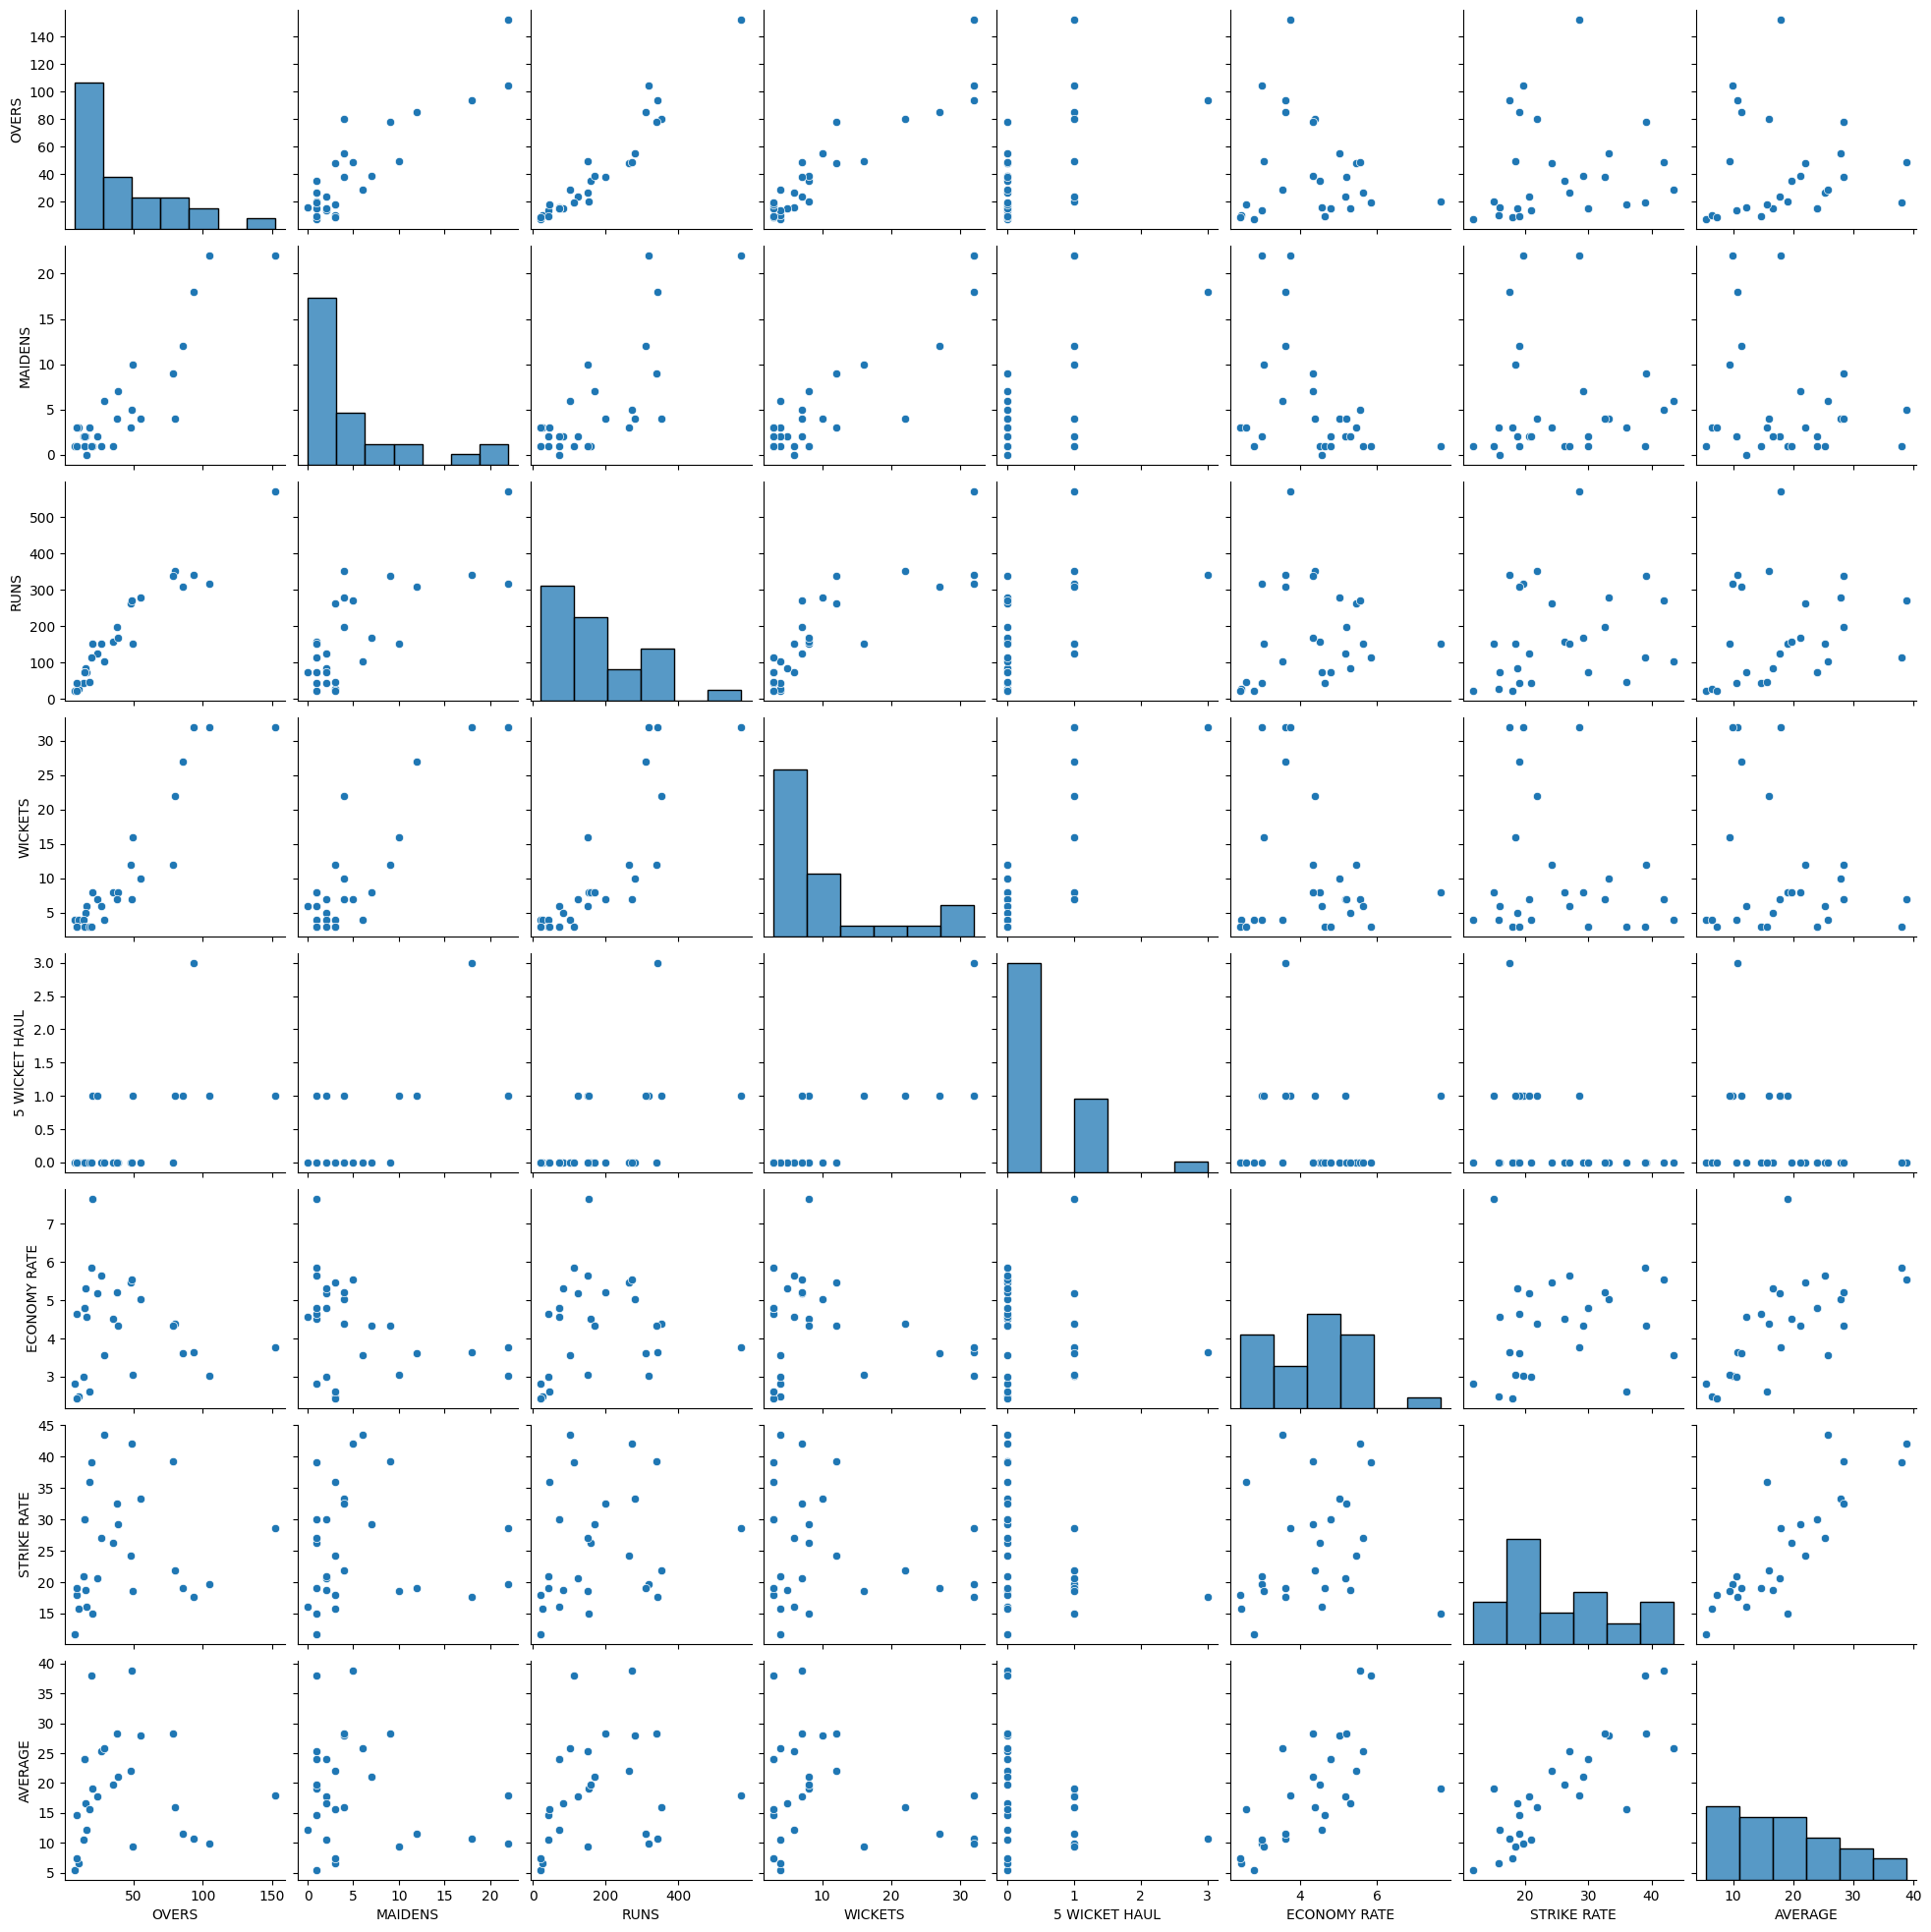

In [7]:
# Creating a pairplot
numeric_df = df.drop('Player', axis=1)
numeric_df = numeric_df.drop('BEST BOWLING', axis=1)
sns.pairplot(numeric_df)

<Axes: >

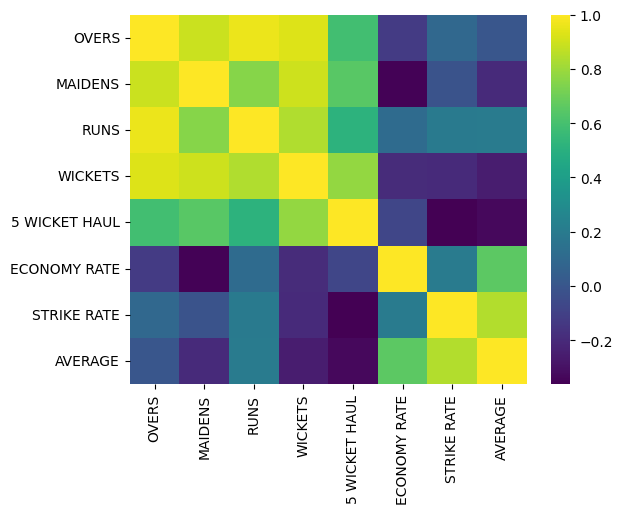

In [8]:
# Plotting a heatmap to show correlation
correlation = numeric_df.corr()
sns.heatmap(correlation, cmap="viridis")

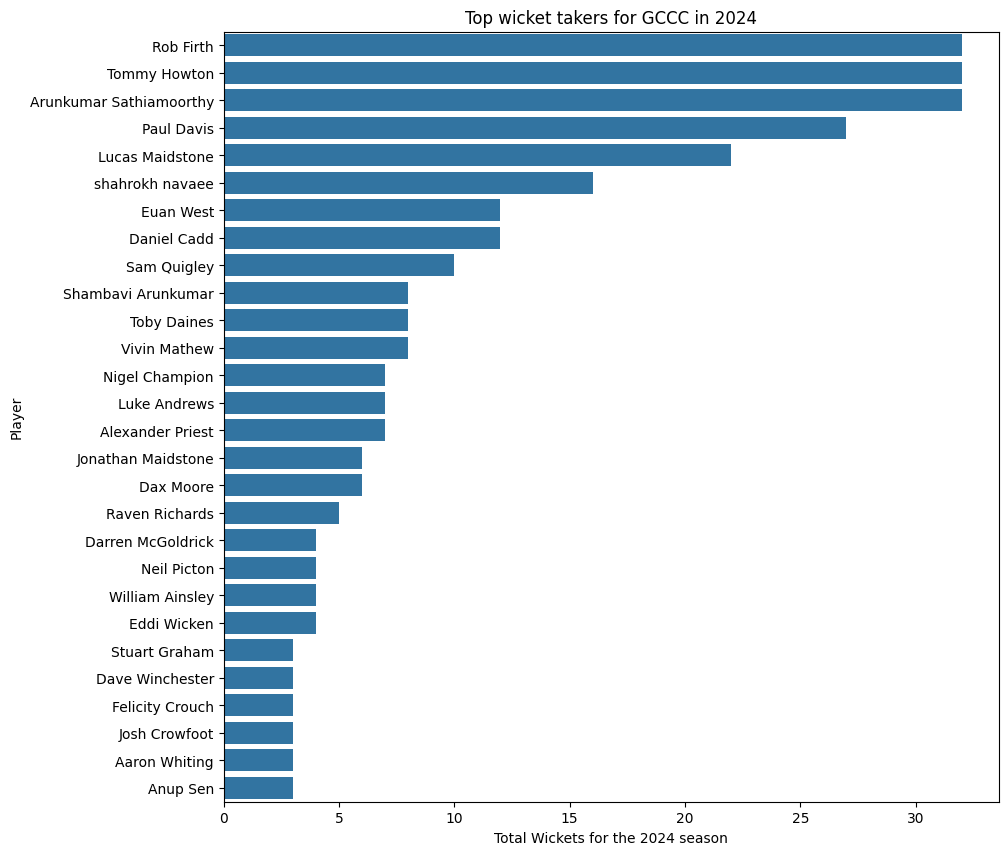

In [9]:
# Creating barplot to show wickets of each player
fig = plt.figure(figsize=(10, 10))
sns.barplot(y=df['Player'], x=df['WICKETS'], data=df)
plt.xlabel('Total Wickets for the 2024 season')
plt.title('Top wicket takers for GCCC in 2024')
plt.show()

<Axes: xlabel='OVERS', ylabel='ECONOMY RATE'>

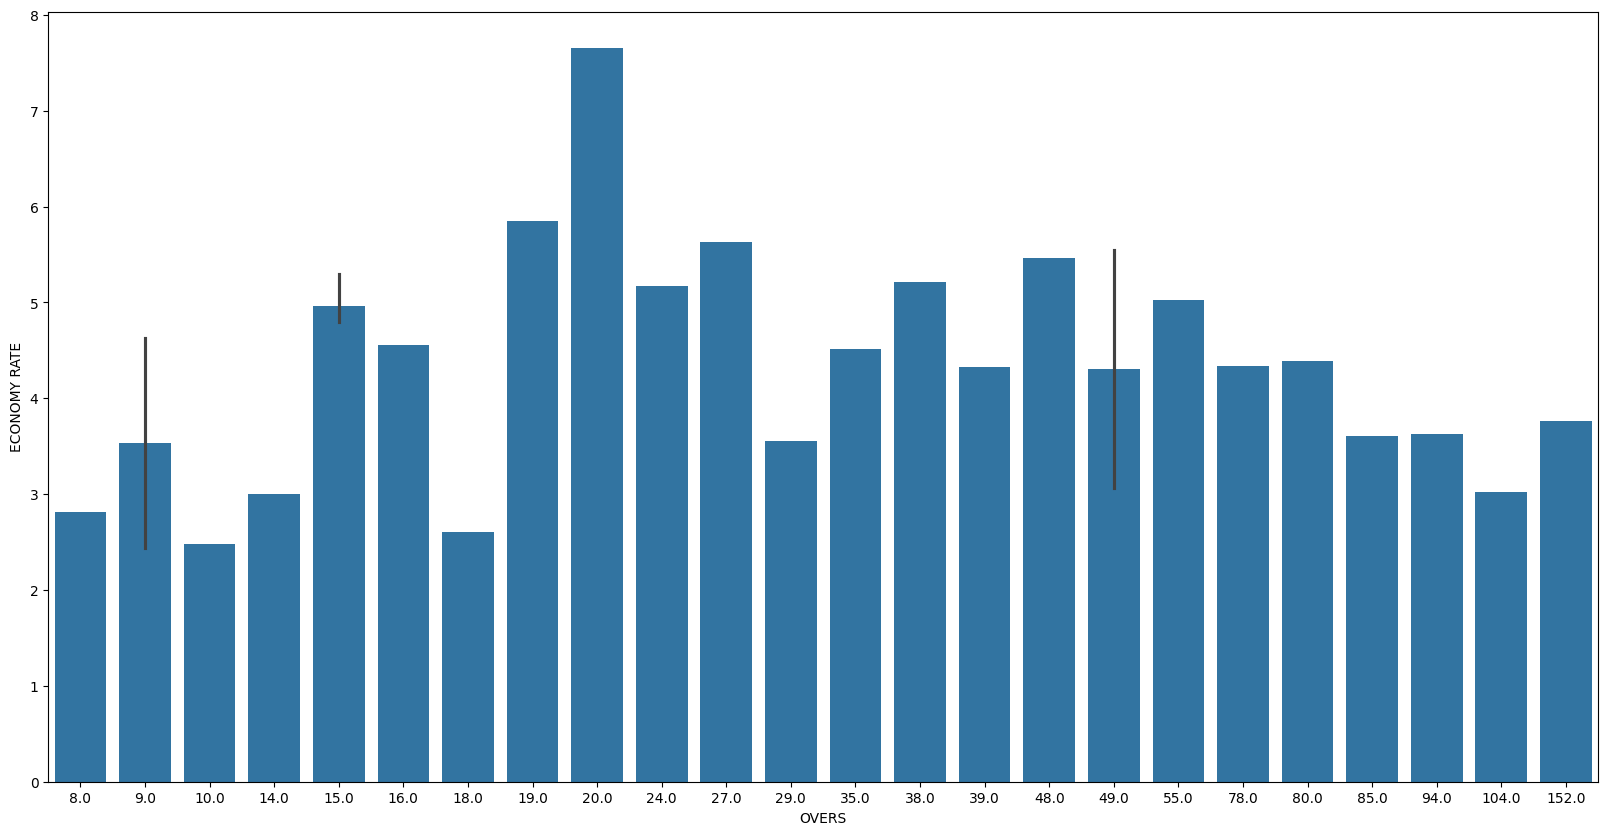

In [14]:
# How number of overs affects economy rate
df_played = df.groupby("OVERS")
df["OVERS"] = df["OVERS"].round(0)
fig = plt.figure(figsize=(20, 10))
sns.barplot(data=df, x=df["OVERS"], y=df["ECONOMY RATE"])